In [1]:
import torch
from diffusers import FluxPipeline
from PIL import Image
import os
import matplotlib.pyplot as plt
import math


In [2]:
from huggingface_hub import login
from google.colab import userdata
hf_token = userdata.get('hf_token')

login(token=hf_token)

In [3]:
os.makedirs("generated_skin_lesions", exist_ok=True)

pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.bfloat16
)
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Generating: benign_nevus_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved to generated_skin_lesions/benign_nevus_1.png
Generating: benign_nevus_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved to generated_skin_lesions/benign_nevus_2.png
Generating: benign_seborrheic_keratosis.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved to generated_skin_lesions/benign_seborrheic_keratosis.png
Generating: malignant_melanoma_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved to generated_skin_lesions/malignant_melanoma_1.png
Generating: malignant_melanoma_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved to generated_skin_lesions/malignant_melanoma_2.png
Generating: basal_cell_carcinoma.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved to generated_skin_lesions/basal_cell_carcinoma.png
All images generated!


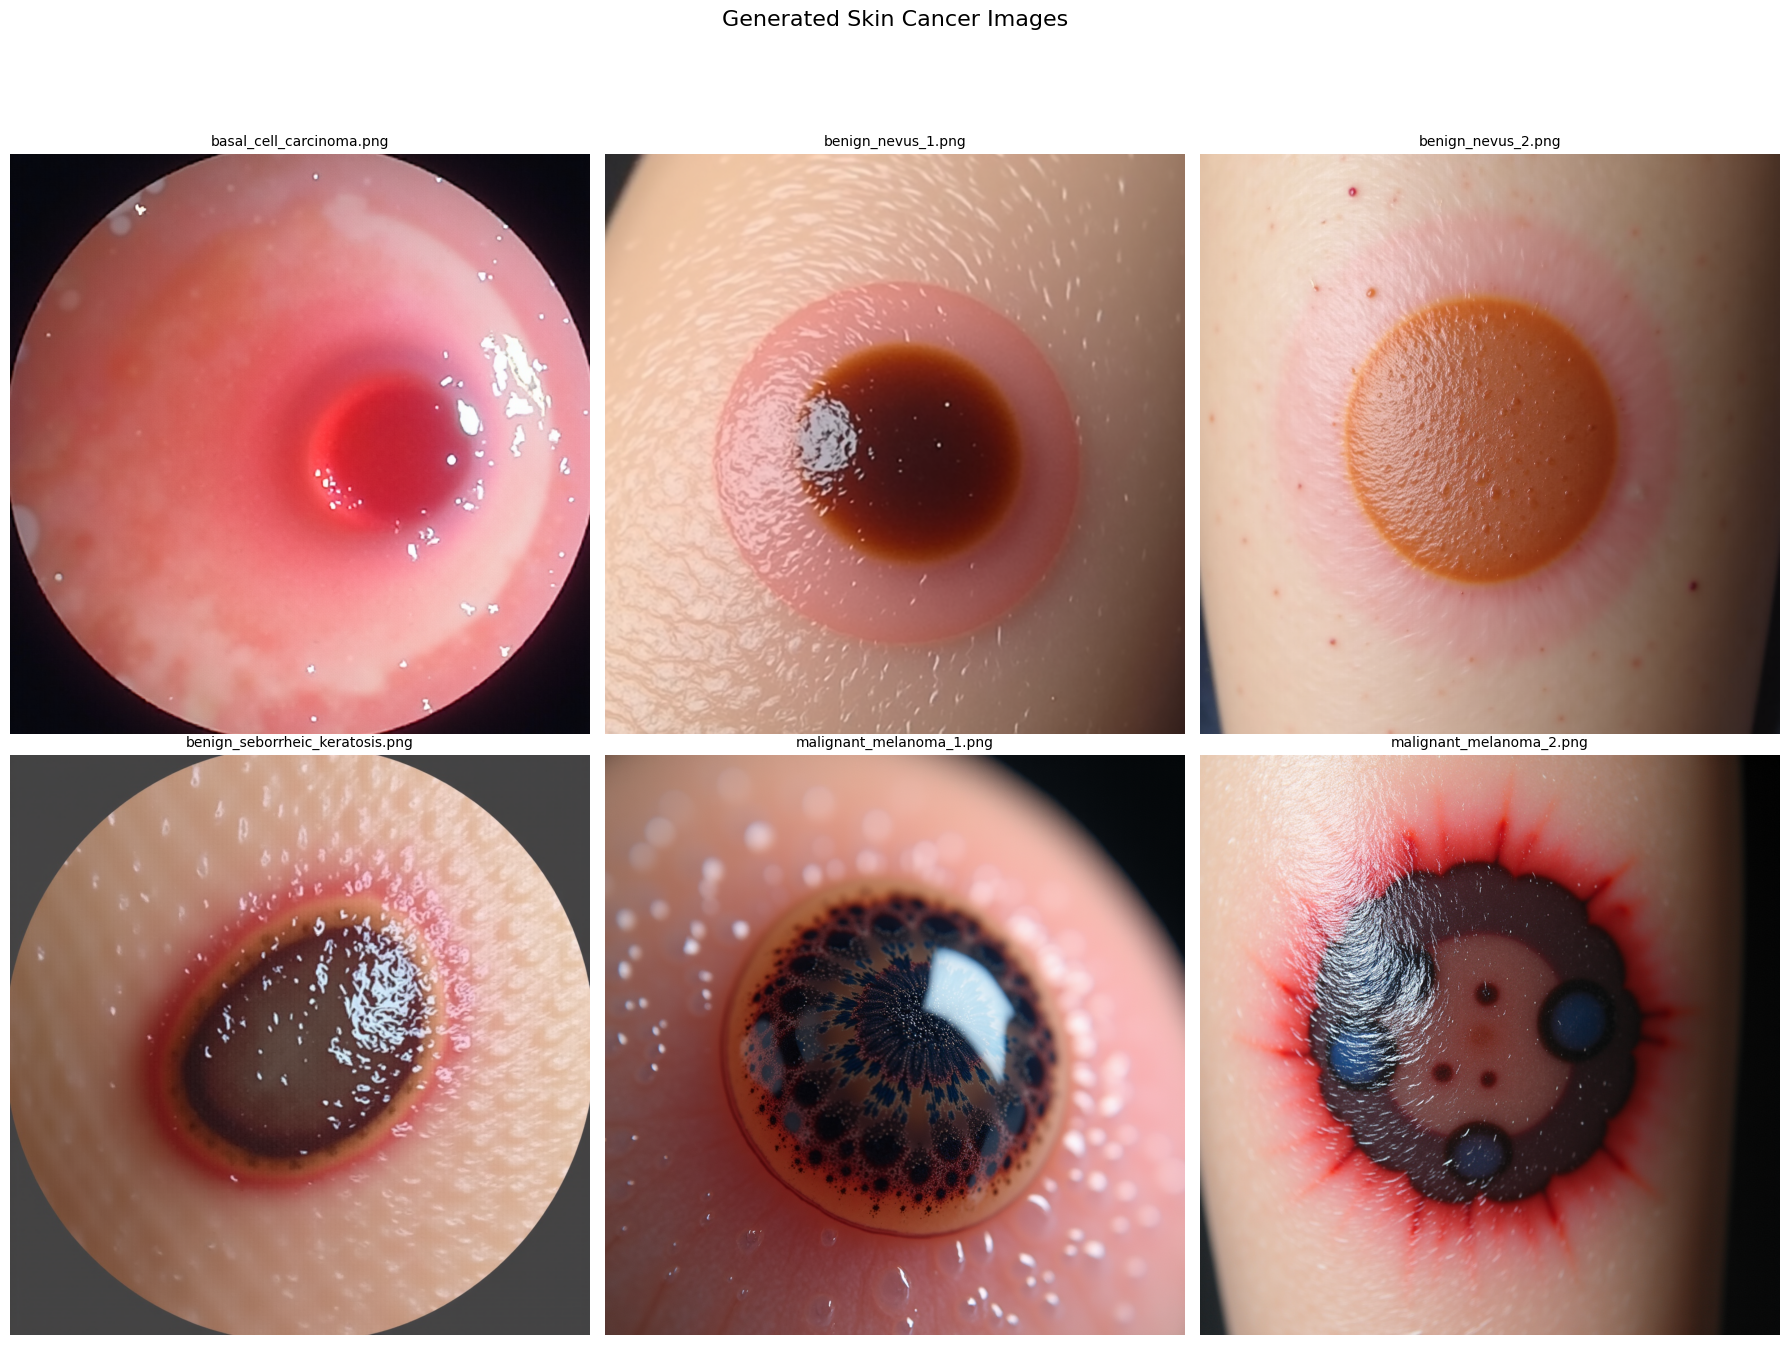

Displayed 6 images from generated_skin_lesions


In [4]:
def generate_skin_cancer_image(prompt, filename, seed=42):
    print(f"Generating: {filename}")
    image = pipe(
        prompt,
        height=1024,
        width=1024,
        guidance_scale=7.5,  # Higher guidance for medical accuracy
        num_inference_steps=50,
        max_sequence_length=512,
        generator=torch.Generator("cpu").manual_seed(seed)
    ).images[0]

    save_path = os.path.join("generated_skin_lesions", filename)
    image.save(save_path)
    print(f"Saved to {save_path}")
    return image

def display_images_from_folder(folder_path, title=None, figsize=(15, 12)):
    """
    Display all images from a specified folder in a grid layout

    Args:
        folder_path (str): Path to the folder containing images
        title (str, optional): Title for the figure
        figsize (tuple, optional): Figure size in inches
    """
    image_files = [f for f in os.listdir(folder_path)
                  if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    if not image_files:
        print(f"No images found in {folder_path}")
        return

    n_images = len(image_files)
    grid_size = math.ceil(math.sqrt(n_images))
    rows = math.ceil(n_images / grid_size)
    cols = min(grid_size, n_images)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    if title:
        fig.suptitle(title, fontsize=16)

    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)

    for i, img_file in enumerate(sorted(image_files)):
        row = i // cols
        col = i % cols

        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)

        axes[row, col].imshow(img)
        axes[row, col].set_title(img_file, fontsize=10)
        axes[row, col].axis('off')

    for i in range(n_images, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9 if title else 1)
    plt.show()
    print(f"Displayed {n_images} images from {folder_path}")

# Dictionary of prompts for different types of skin cancer
benign_prompts = [
    {
        "prompt": "Hyperrealistic dermatoscopic image of a benign melanocytic nevus, symmetrical round shape with smooth regular borders, uniform brown pigmentation, macro photograph with clear clinical details, medical textbook quality, dermatology reference image",
        "filename": "benign_nevus_1.png"
    },
    {
        "prompt": "Professional clinical photograph of a benign dermal nevus, round symmetrical shape, well-defined borders, homogeneous tan coloration, dermatoscopic view showing regular reticular pattern, high resolution medical imaging, for dermatology education",
        "filename": "benign_nevus_2.png"
    },
    {
        "prompt": "Medical dermatoscopic photograph of a benign seborrheic keratosis lesion, waxy brown-gray appearance, stuck-on appearance, sharp borders, typical keratotic surface with horn cysts visible, dermatology atlas reference image, high detail clinical photography",
        "filename": "benign_seborrheic_keratosis.png"
    }
]

malignant_prompts = [
    {
        "prompt": "Hyperrealistic dermatoscopic image of malignant melanoma, asymmetrical shape with irregular jagged borders, variegated coloration with black, brown, and blue areas, diameter >6mm, ulceration visible, macro photograph with clear clinical details, medical textbook quality",
        "filename": "malignant_melanoma_1.png"
    },
    {
        "prompt": "Professional clinical photograph of invasive malignant melanoma, ABCDE criteria visible: asymmetric shape, irregular notched borders, multiple colors (dark brown, black, red, and blue areas), 12mm diameter, evolution from previous lesion, dermatoscopic view showing blue-white veil and atypical vascular pattern",
        "filename": "malignant_melanoma_2.png"
    },
    {
        "prompt": "Medical dermatoscopic photograph of basal cell carcinoma, pearly translucent appearance with visible telangiectatic vessels, irregular borders, ulcerated center, pink to red coloration, high resolution medical imaging showing dermatoscopic features, for dermatology education",
        "filename": "basal_cell_carcinoma.png"
    }
]

# Generate benign lesion images
for i, prompt_data in enumerate(benign_prompts):
    generate_skin_cancer_image(
        prompt_data["prompt"],
        prompt_data["filename"],
        seed=42+i
    )

# Generate malignant lesion images
for i, prompt_data in enumerate(malignant_prompts):
    generate_skin_cancer_image(
        prompt_data["prompt"],
        prompt_data["filename"],
        seed=142+i
    )

print("All images generated!")

# Display the generated images
display_images_from_folder("generated_skin_lesions",
                          title="Generated Skin Cancer Images",
                          figsize=(18, 14))